In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [50]:
data = pd.read_csv('shotData.csv')
data[['shot_x', 'shot_y']] = data[['shot_x', 'shot_y']].fillna(0)
data_for_clustering = data[['shot_x', 'shot_y']]

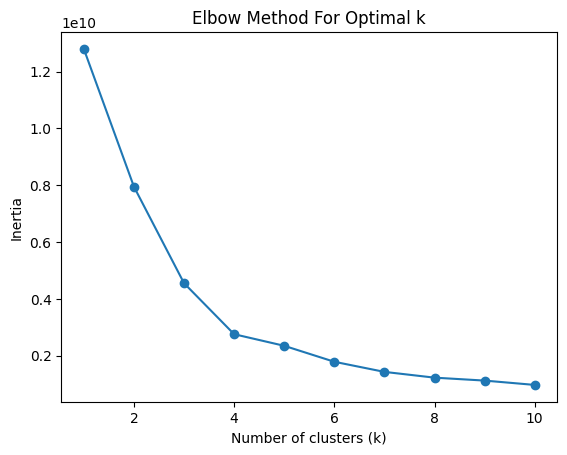

In [51]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [52]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_for_clustering)

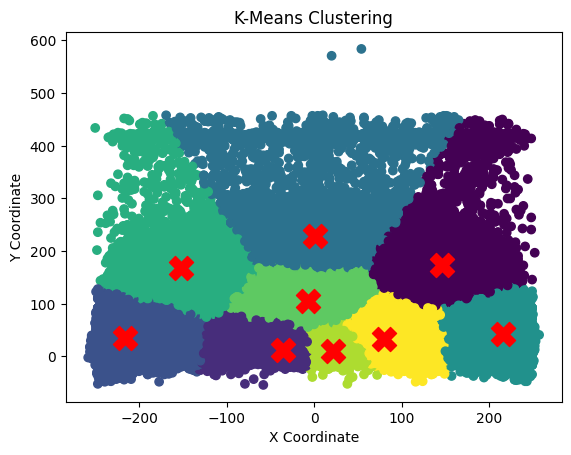

In [53]:
plt.scatter(data_for_clustering['shot_x'], data_for_clustering['shot_y'], c=data['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('K-Means Clustering')
plt.show()